In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
from matplotlib import font_manager as fm
from matplotlib.patches import Rectangle

# Load csv files 
circuits = pd.read_csv('historic_data/circuits.csv')
constructor_results = pd.read_csv('historic_data/constructor_results.csv')
constructor_standings = pd.read_csv('historic_data/constructor_standings.csv')
constructors = pd.read_csv('historic_data/constructors.csv')
driver_standings = pd.read_csv('historic_data/driver_standings.csv')
drivers = pd.read_csv('historic_data/drivers.csv')
pit_stops = pd.read_csv('historic_data/pit_stops.csv')
qualifying = pd.read_csv('historic_data/qualifying.csv')
races = pd.read_csv('historic_data/races.csv')
results = pd.read_csv('historic_data/results.csv')
seasons = pd.read_csv('historic_data/seasons.csv')
sprint_results = pd.read_csv('historic_data/sprint_results.csv')
status = pd.read_csv('historic_data/status.csv')

# 2022 season
results_2022 = results[results['raceId'].isin(races[races['year'] == 2022]['raceId'])]

# Remove duplicates
results_2022 = results_2022.drop_duplicates(subset=['raceId', 'driverId'])
sprint_results_2022 = sprint_results[sprint_results['raceId'].isin(races[races['year'] == 2022]['raceId'])].drop_duplicates(subset=['raceId', 'driverId'])

# Sum points
driver_points_2022_corrected = results_2022.groupby('driverId')['points'].sum().reset_index()

# Sum sprint points
sprint_driver_points_2022_corrected = sprint_results_2022.groupby('driverId')['points'].sum().reset_index()

# Merge the sprint points with the regular race points
total_driver_points_2022_corrected = pd.merge(driver_points_2022_corrected, sprint_driver_points_2022_corrected, on='driverId', how='left', suffixes=('', '_sprint'))

# Replace NaN values in sprint points with 0
total_driver_points_2022_corrected['points_sprint'] = total_driver_points_2022_corrected['points_sprint'].fillna(0)

# Calculate the total points including sprint race points
total_driver_points_2022_corrected['total_points'] = total_driver_points_2022_corrected['points'] + total_driver_points_2022_corrected['points_sprint']

# Merge with driver names
total_driver_points_2022_corrected = total_driver_points_2022_corrected.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Add full name column
total_driver_points_2022_corrected['full_name'] = total_driver_points_2022_corrected['forename'] + ' ' + total_driver_points_2022_corrected['surname']

# Display the final corrected total points
total_driver_points_2022_corrected = total_driver_points_2022_corrected[['full_name', 'total_points']].sort_values(by='total_points', ascending=False)

# add new column final points
total_driver_points_2022_corrected['final_points'] = total_driver_points_2022_corrected['total_points']

total_driver_points_2022_corrected = total_driver_points_2022_corrected[['full_name', 'total_points', 'final_points']].sort_values(by='total_points', ascending=False)

print(total_driver_points_2022_corrected)


           full_name  total_points  final_points
8     Max Verstappen         454.0         454.0
13   Charles Leclerc         308.0         308.0
4       Sergio Pérez         305.0         305.0
15    George Russell         275.0         275.0
9       Carlos Sainz         246.0         246.0
0     Lewis Hamilton         240.0         240.0
14      Lando Norris         122.0         122.0
10      Esteban Ocon          92.0          92.0
1    Fernando Alonso          81.0          81.0
6    Valtteri Bottas          49.0          49.0
5   Daniel Ricciardo          37.0          37.0
2   Sebastian Vettel          37.0          37.0
7    Kevin Magnussen          25.0          25.0
12      Pierre Gasly          23.0          23.0
11      Lance Stroll          18.0          18.0
18      Yuki Tsunoda          12.0          12.0
19   Mick Schumacher          12.0          12.0
20       Guanyu Zhou           6.0           6.0
16   Alexander Albon           4.0           4.0
17   Nicholas Latifi

In [15]:
# Final points for 2023 season
final_points_data = {
    'full_name': [
        'Max Verstappen', 'Sergio Pérez', 'Lewis Hamilton', 'Fernando Alonso', 'Charles Leclerc', 
        'Lando Norris', 'Carlos Sainz', 'George Russell', 'Oscar Piastri', 'Lance Stroll', 
        'Pierre Gasly', 'Esteban Ocon', 'Alexander Albon', 'Yuki Tsunoda', 'Valtteri Bottas', 
        'Nico Hülkenberg', 'Daniel Ricciardo', 'Guanyu Zhou', 'Kevin Magnussen', 'Liam Lawson', 
        'Logan Sargeant', 'Nyck de Vries'
    ],
    'final_points': [
        575, 285, 234, 206, 206, 205, 200, 175, 97, 74, 
        62, 58, 27, 17, 10, 9, 6, 6, 3, 2, 1, 0
    ]
}

# Create DataFrame for final points
final_points_df = pd.DataFrame(final_points_data)

# Ensure driver names in the original data match the provided names
drivers['full_name'] = drivers['forename'] + ' ' + drivers['surname']

# Merge the final points with the drivers DataFrame
drivers_with_final_points = pd.merge(drivers, final_points_df, on='full_name', how='left')

# Filter races for the 2023 season
race_ids_2023 = races[races['year'] == 2023]['raceId']

# Merge the drivers with final points back into the results
results_2023 = results[results['raceId'].isin(race_ids_2023)]
results_2023 = pd.merge(results_2023, drivers_with_final_points[['driverId', 'full_name', 'final_points']], on='driverId', how='left')

# Remove duplicates from the results and sprint_results data
results_2023 = results_2023.drop_duplicates(subset=['raceId', 'driverId'])
sprint_results_2023 = sprint_results[sprint_results['raceId'].isin(race_ids_2023)].drop_duplicates(subset=['raceId', 'driverId'])

# Sum points from 2023 season
driver_points_2023_corrected = results_2023.groupby('driverId')['points'].sum().reset_index()

# Sum points from 2023 sprint races
sprint_driver_points_2023_corrected = sprint_results_2023.groupby('driverId')['points'].sum().reset_index()

# Merge the sprint points with the regular race points
total_driver_points_2023_corrected = pd.merge(driver_points_2023_corrected, sprint_driver_points_2023_corrected, on='driverId', how='left', suffixes=('', '_sprint'))

# Replace NaN values in sprint points with 0
total_driver_points_2023_corrected['points_sprint'] = total_driver_points_2023_corrected['points_sprint'].fillna(0)

# Calculate the total points
total_driver_points_2023_corrected['total_points'] = total_driver_points_2023_corrected['points'] + total_driver_points_2023_corrected['points_sprint']

# Merge with driver names
total_driver_points_2023_corrected = total_driver_points_2023_corrected.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Add full name column
total_driver_points_2023_corrected['full_name'] = total_driver_points_2023_corrected['forename'] + ' ' + total_driver_points_2023_corrected['surname']

# Add the final points column
total_driver_points_2023_corrected = total_driver_points_2023_corrected.merge(final_points_df, on='full_name', how='left')

total_driver_points_2023_corrected = total_driver_points_2023_corrected[['full_name', 'total_points', 'final_points']].sort_values(by='total_points', ascending=False)

print(total_driver_points_2023_corrected)


           full_name  total_points  final_points
7     Max Verstappen         314.0           575
3       Sergio Pérez         189.0           285
1    Fernando Alonso         149.0           206
0     Lewis Hamilton         148.0           234
14    George Russell          99.0           175
12   Charles Leclerc          99.0           206
8       Carlos Sainz          92.0           200
13      Lando Norris          69.0           205
10      Lance Stroll          47.0            74
9       Esteban Ocon          35.0            58
19     Oscar Piastri          34.0            97
11      Pierre Gasly          22.0            62
15   Alexander Albon          11.0            27
2    Nico Hülkenberg           9.0             9
5    Valtteri Bottas           5.0            10
17       Guanyu Zhou           4.0             6
16      Yuki Tsunoda           3.0            17
6    Kevin Magnussen           2.0             3
4   Daniel Ricciardo           0.0             6
18     Nyck de Vries

In [16]:

# Final points 2021
final_points_data_2021 = {
    'full_name': [
        'Max Verstappen', 'Lewis Hamilton', 'Valtteri Bottas', 'Sergio Pérez', 'Carlos Sainz', 
        'Lando Norris', 'Charles Leclerc', 'Daniel Ricciardo', 'Pierre Gasly', 'Fernando Alonso', 
        'Esteban Ocon', 'Sebastian Vettel', 'Lance Stroll', 'Yuki Tsunoda', 'George Russell', 
        'Kimi Räikkönen', 'Nicholas Latifi', 'Antonio Giovinazzi', 'Mick Schumacher', 'Robert Kubica', 
        'Nikita Mazepin'
    ],
    'final_points': [
        395.5, 387.5, 226, 190, 164.5, 160, 159, 115, 110, 81, 
        74, 43, 34, 32, 16, 10, 7, 3, 0, 0, 0
    ]
}

final_points_df_2021 = pd.DataFrame(final_points_data_2021)

drivers['full_name'] = drivers['forename'] + ' ' + drivers['surname']

# Merge the final points with the drivers DataFrame
drivers_with_final_points_2021 = pd.merge(drivers, final_points_df_2021, on='full_name', how='left')

# Filter races for the 2021 season
race_ids_2021 = races[races['year'] == 2021]['raceId']

# Merge the drivers with final points back into the results DataFrame for 2021
results_2021 = results[results['raceId'].isin(race_ids_2021)]
results_2021 = pd.merge(results_2021, drivers_with_final_points_2021[['driverId', 'full_name', 'final_points']], on='driverId', how='left')

# Remove duplicates from the results and sprint_results data
results_2021 = results_2021.drop_duplicates(subset=['raceId', 'driverId'])
sprint_results_2021 = sprint_results[sprint_results['raceId'].isin(race_ids_2021)].drop_duplicates(subset=['raceId', 'driverId'])

# Sum the points for each driver in the 2021 season from race results
driver_points_2021_corrected = results_2021.groupby('driverId')['points'].sum().reset_index()

# Sum the points for each driver in the 2021 season from sprint race results
sprint_driver_points_2021_corrected = sprint_results_2021.groupby('driverId')['points'].sum().reset_index()

# Merge the sprint points with the regular race points
total_driver_points_2021_corrected = pd.merge(driver_points_2021_corrected, sprint_driver_points_2021_corrected, on='driverId', how='left', suffixes=('', '_sprint'))

# Replace NaN values in sprint points with 0
total_driver_points_2021_corrected['points_sprint'] = total_driver_points_2021_corrected['points_sprint'].fillna(0)

# Calculate the total points including sprint race points
total_driver_points_2021_corrected['total_points'] = total_driver_points_2021_corrected['points'] + total_driver_points_2021_corrected['points_sprint']

# Merge with driver names
total_driver_points_2021_corrected = total_driver_points_2021_corrected.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

# Add full name column
total_driver_points_2021_corrected['full_name'] = total_driver_points_2021_corrected['forename'] + ' ' + total_driver_points_2021_corrected['surname']

# Add the final points column
total_driver_points_2021_corrected = total_driver_points_2021_corrected.merge(final_points_df_2021, on='full_name', how='left')

# Display the final corrected total points
total_driver_points_2021_corrected = total_driver_points_2021_corrected[['full_name', 'total_points', 'final_points']].sort_values(by='total_points', ascending=False)

print(total_driver_points_2021_corrected)


             full_name  total_points  final_points
8       Max Verstappen         395.5         395.5
0       Lewis Hamilton         387.5         387.5
7      Valtteri Bottas         226.0         226.0
5         Sergio Pérez         190.0         190.0
9         Carlos Sainz         164.5         164.5
15        Lando Norris         160.0         160.0
14     Charles Leclerc         159.0         159.0
6     Daniel Ricciardo         115.0         115.0
13        Pierre Gasly         110.0         110.0
1      Fernando Alonso          81.0          81.0
10        Esteban Ocon          74.0          74.0
4     Sebastian Vettel          43.0          43.0
11        Lance Stroll          34.0          34.0
18        Yuki Tsunoda          32.0          32.0
16      George Russell          16.0          16.0
2       Kimi Räikkönen          10.0          10.0
17     Nicholas Latifi           7.0           7.0
12  Antonio Giovinazzi           3.0           3.0
3        Robert Kubica         

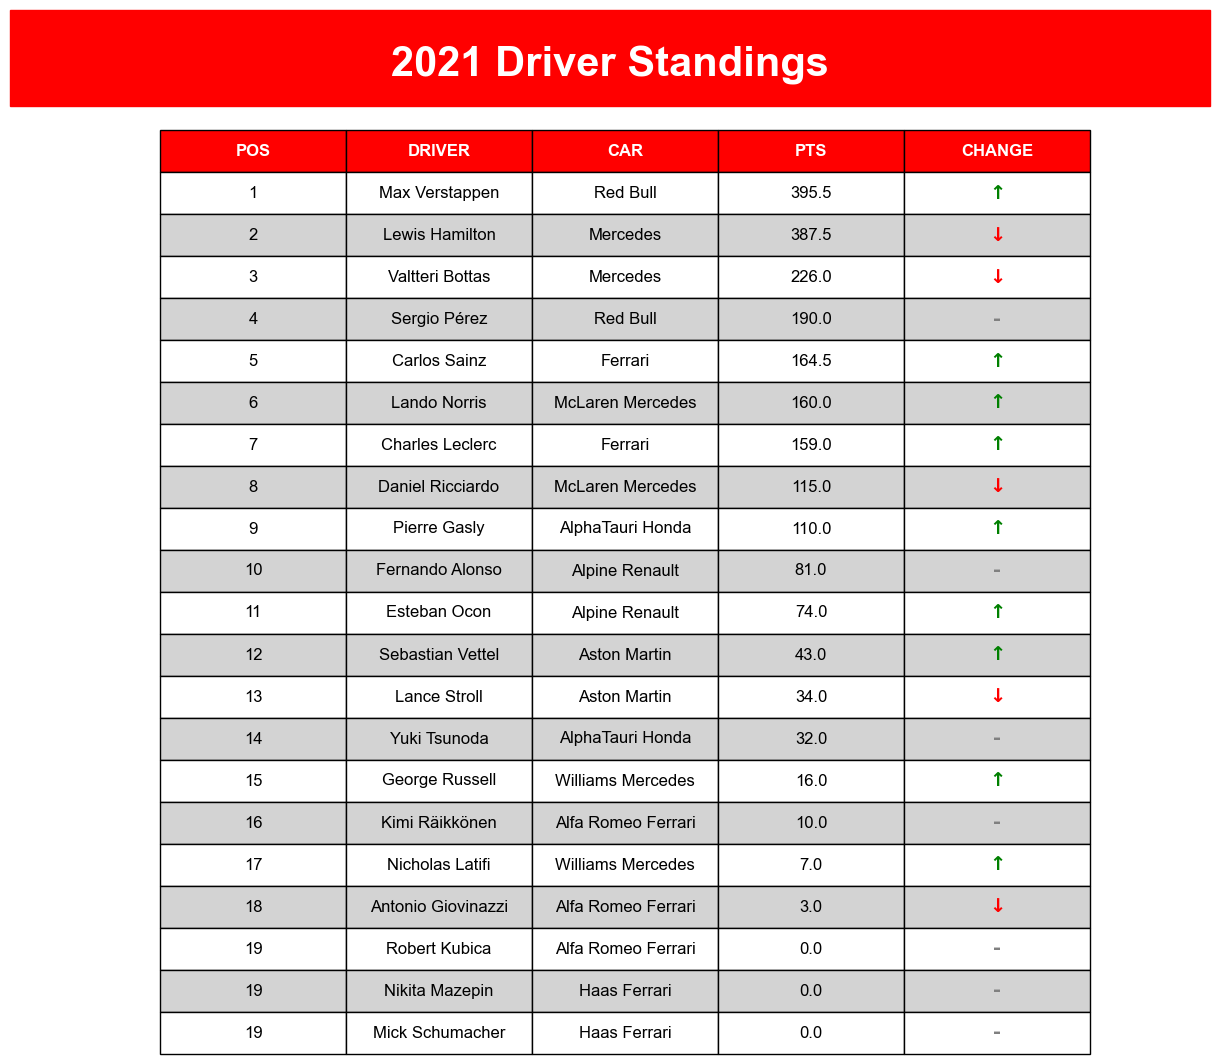

In [76]:
# Define the dataframe for 2021
df_2021 = total_driver_points_2021_corrected.copy()

# Example car data, replace with actual car data
car_data = {
    'Max Verstappen': 'Red Bull',
    'Lewis Hamilton': 'Mercedes',
    'Valtteri Bottas': 'Mercedes',
    'Sergio Pérez': 'Red Bull',
    'Carlos Sainz': 'Ferrari',
    'Lando Norris': 'McLaren Mercedes',
    'Charles Leclerc': 'Ferrari',
    'Daniel Ricciardo': 'McLaren Mercedes',
    'Pierre Gasly': 'AlphaTauri Honda',
    'Fernando Alonso': 'Alpine Renault',
    'Esteban Ocon': 'Alpine Renault',
    'Sebastian Vettel': 'Aston Martin',
    'Lance Stroll': 'Aston Martin',
    'Yuki Tsunoda': 'AlphaTauri Honda',
    'George Russell': 'Williams Mercedes',
    'Kimi Räikkönen': 'Alfa Romeo Ferrari',
    'Nicholas Latifi': 'Williams Mercedes',
    'Antonio Giovinazzi': 'Alfa Romeo Ferrari',
    'Mick Schumacher': 'Haas Ferrari',
    'Robert Kubica': 'Alfa Romeo Ferrari',
    'Nikita Mazepin': 'Haas Ferrari'
}

# Add the car column to the dataframe
df_2021['car'] = df_2021['full_name'].map(car_data)

# Add position column
df_2021['position'] = df_2021['final_points'].rank(ascending=False, method='min').astype(int)

# Manually create the arrow column based on the 2020 results
arrow_data = {
    'Lewis Hamilton': '↓',
    'Max Verstappen': '↑',
    'Valtteri Bottas': '↓',
    'Sergio Pérez': '-',
    'Carlos Sainz': '↑',
    'Lando Norris': '↑',
    'Charles Leclerc': '↑',
    'Daniel Ricciardo': '↓',
    'Pierre Gasly': '↑',
    'Fernando Alonso': '-',
    'Esteban Ocon': '↑',
    'Sebastian Vettel': '↑',
    'Lance Stroll': '↓',
    'Yuki Tsunoda': '-',
    'George Russell': '↑',
    'Kimi Räikkönen': '-',
    'Nicholas Latifi': '↑',
    'Antonio Giovinazzi': '↓',
    'Mick Schumacher': '-',
    'Robert Kubica': '-',
    'Nikita Mazepin': '-'
}

# Add the arrow column to the dataframe
df_2021['change'] = df_2021['full_name'].map(arrow_data)

# Function to create table
def create_table(ax, df, season):
    table = Table(ax, bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    columns = ['POS', 'DRIVER', 'CAR', 'PTS', 'CHANGE']
    
    # Add table headers with red background
    for i, col in enumerate(columns):
        header_cell = table.add_cell(0, i, width=1.0/len(columns), height=0.05, text=col, loc='center', facecolor='red', fontproperties=fm.FontProperties(weight='bold', size=12, family='Arial'))
        header_cell.get_text().set_color('white')
    
    # Add table data
    for i in range(len(df)):
        row_color = 'white' if i % 2 == 0 else 'lightgrey'
        table.add_cell(i+1, 0, width=1.0/len(columns), height=0.05, text=df.iloc[i]['position'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        table.add_cell(i+1, 1, width=1.0/len(columns), height=0.05, text=df.iloc[i]['full_name'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        table.add_cell(i+1, 2, width=1.0/len(columns), height=0.05, text=df.iloc[i]['car'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        table.add_cell(i+1, 3, width=1.0/len(columns), height=0.05, text=df.iloc[i]['final_points'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        
        arrow_cell = table.add_cell(i+1, 4, width=1.0/len(columns), height=0.05, text=df.iloc[i]['change'], loc='center', facecolor=row_color)
        arrow_cell.get_text().set_fontsize(14)
        arrow_cell.get_text().set_fontweight('bold')
        if df.iloc[i]['change'] == '↑':
            arrow_cell.get_text().set_color('green')
        elif df.iloc[i]['change'] == '↓':
            arrow_cell.get_text().set_color('red')
        else:
            arrow_cell.get_text().set_color('grey')

    ax.add_table(table)
    ax.axis('off')

# Create the plot for 2021
fig, ax = plt.subplots(figsize=(12, 12))

# Add a red rectangle behind the title
fig.patches.extend([Rectangle((0,0.9),1,0.08, color='red', zorder=-1, transform=fig.transFigure, figure=fig)])

# Set the title with white font after creating the red rectangle
fig.suptitle('2021 Driver Standings', fontsize=30, weight='bold', color='white', x=0.5, y=0.95, ha='center', fontproperties=fm.FontProperties(family='Arial'))

create_table(ax, df_2021, '2021')

plt.show()


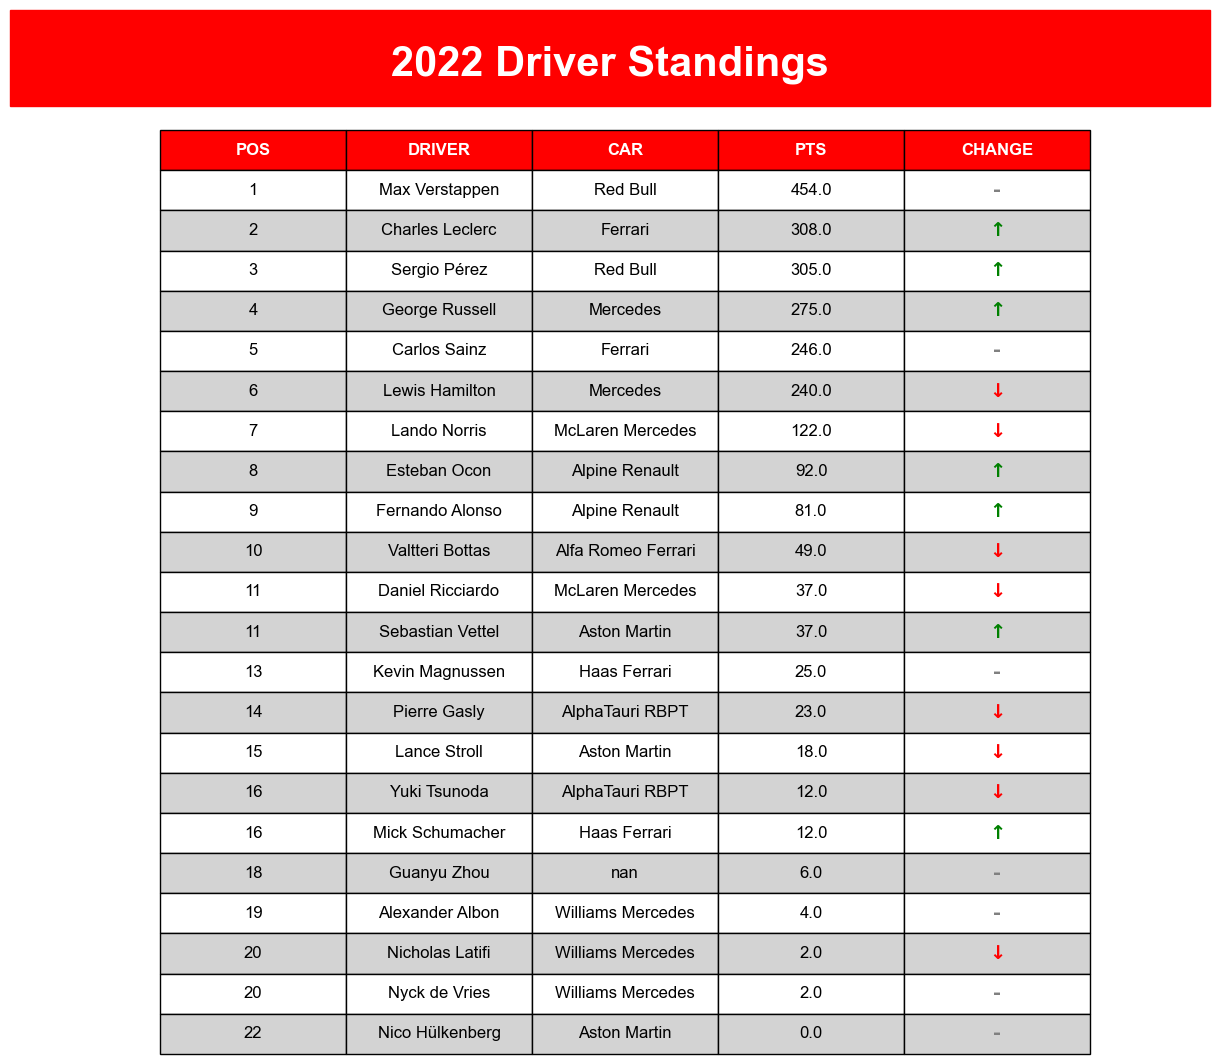

In [75]:
# Define the dataframes for 2021 and 2022
df_2021 = total_driver_points_2021_corrected.copy()
df_2022 = total_driver_points_2022_corrected.copy()

# Example car data, replace with actual car data
car_data = {
    'Max Verstappen': 'Red Bull',
    'Charles Leclerc': 'Ferrari',
    'Sergio Pérez': 'Red Bull',
    'George Russell': 'Mercedes',
    'Carlos Sainz': 'Ferrari',
    'Lewis Hamilton': 'Mercedes',
    'Lando Norris': 'McLaren Mercedes',
    'Esteban Ocon': 'Alpine Renault',
    'Fernando Alonso': 'Alpine Renault',
    'Valtteri Bottas': 'Alfa Romeo Ferrari',
    'Daniel Ricciardo': 'McLaren Mercedes',
    'Sebastian Vettel': 'Aston Martin',
    'Kevin Magnussen': 'Haas Ferrari',
    'Pierre Gasly': 'AlphaTauri RBPT',
    'Lance Stroll': 'Aston Martin',
    'Mick Schumacher': 'Haas Ferrari',
    'Yuki Tsunoda': 'AlphaTauri RBPT',
    'Zhou Guanyu': 'Alfa Romeo Ferrari',
    'Alexander Albon': 'Williams Mercedes',
    'Nicholas Latifi': 'Williams Mercedes',
    'Nyck de Vries': 'Williams Mercedes',
    'Nico Hülkenberg': 'Aston Martin',
}

# Add the car column to the dataframes
df_2021['car'] = df_2021['full_name'].map(car_data)
df_2022['car'] = df_2022['full_name'].map(car_data)

# Add position columns
df_2021['position'] = df_2021['final_points'].rank(ascending=False, method='min').astype(int)
df_2022['position'] = df_2022['final_points'].rank(ascending=False, method='min').astype(int)

# Function to add arrows based on position change
def add_arrows(current_df, previous_df):
    arrows = []
    for name in current_df['full_name']:
        current_pos = current_df[current_df['full_name'] == name]['position'].values[0]
        if name in previous_df['full_name'].values:
            previous_pos = previous_df[previous_df['full_name'] == name]['position'].values[0]
            if current_pos < previous_pos:
                arrows.append('↑')
            elif current_pos > previous_pos:
                arrows.append('↓')
            else:
                arrows.append('-')
        else:
            arrows.append('-')
    return arrows

# Add arrows for 2022
df_2022['arrow'] = add_arrows(df_2022, df_2021)

# Function to create table
def create_table(ax, df, season):
    table = Table(ax, bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    columns = ['POS', 'DRIVER', 'CAR', 'PTS', 'CHANGE']
    
    # Add table headers with red background
    for i, col in enumerate(columns):
        header_cell = table.add_cell(0, i, width=1.0/len(columns), height=0.05, text=col, loc='center', facecolor='red', fontproperties=fm.FontProperties(weight='bold', size=12, family='Arial'))
        header_cell.get_text().set_color('white')
    
    # Add table data
    for i in range(len(df)):
        row_color = 'white' if i % 2 == 0 else 'lightgrey'
        table.add_cell(i+1, 0, width=1.0/len(columns), height=0.05, text=df.iloc[i]['position'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        table.add_cell(i+1, 1, width=1.0/len(columns), height=0.05, text=df.iloc[i]['full_name'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        table.add_cell(i+1, 2, width=1.0/len(columns), height=0.05, text=df.iloc[i]['car'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        table.add_cell(i+1, 3, width=1.0/len(columns), height=0.05, text=df.iloc[i]['final_points'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        
        arrow_cell = table.add_cell(i+1, 4, width=1.0/len(columns), height=0.05, text=df.iloc[i]['arrow'], loc='center', facecolor=row_color)
        arrow_cell.get_text().set_fontsize(14)
        arrow_cell.get_text().set_fontweight('bold')
        if df.iloc[i]['arrow'] == '↑':
            arrow_cell.get_text().set_color('green')
        elif df.iloc[i]['arrow'] == '↓':
            arrow_cell.get_text().set_color('red')
        else:
            arrow_cell.get_text().set_color('grey')

    ax.add_table(table)
    ax.axis('off')

# Create the plot for 2022
fig, ax = plt.subplots(figsize=(12, 12))

# Add a red rectangle behind the title
fig.patches.extend([Rectangle((0,0.9),1,0.08, color='red', zorder=-1, transform=fig.transFigure, figure=fig)])

# Set the title with white font after creating the red rectangle
fig.suptitle('2022 Driver Standings', fontsize=30, weight='bold', color='white', x=0.5, y=0.95, ha='center', fontproperties=fm.FontProperties(family='Arial'))

create_table(ax, df_2022, '2022')

plt.show()


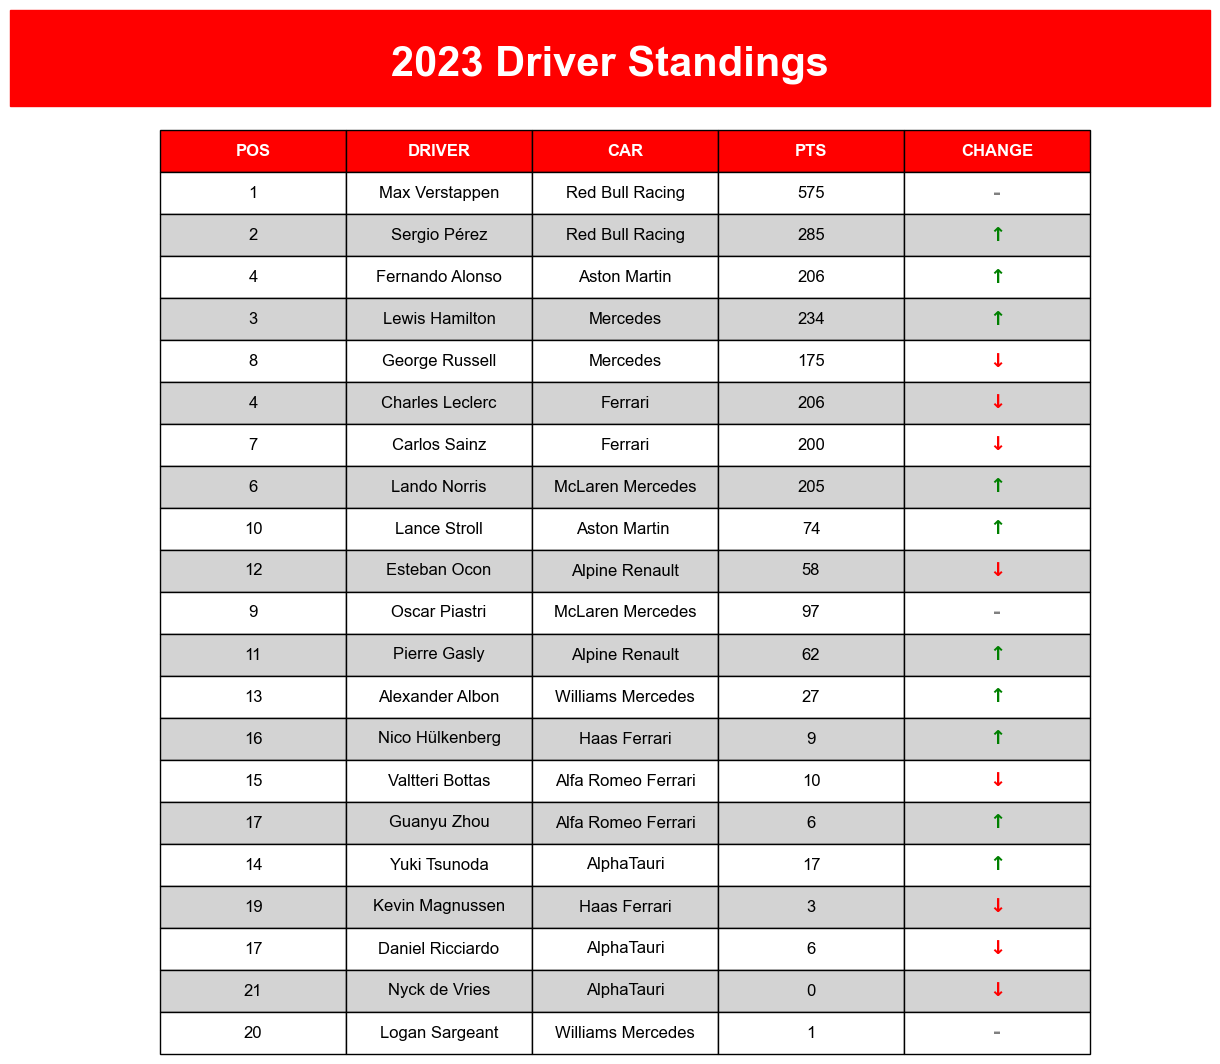

In [73]:
# Assume that total_driver_points_2022_corrected and total_driver_points_2023_corrected are already defined

# Define the dataframes for 2022 and 2023
df_2022 = total_driver_points_2022_corrected.copy()
df_2023 = total_driver_points_2023_corrected.copy()

# Example car data, replace with actual car data
car_data = {
    'Max Verstappen': 'Red Bull',
    'Sergio Pérez': 'Red Bull',
    'Lewis Hamilton': 'Mercedes',
    'Fernando Alonso': 'Aston Martin',
    'Charles Leclerc': 'Ferrari',
    'Lando Norris': 'McLaren Mercedes',
    'Carlos Sainz': 'Ferrari',
    'George Russell': 'Mercedes',
    'Oscar Piastri': 'McLaren Mercedes',
    'Lance Stroll': 'Aston Martin ',
    'Pierre Gasly': 'Alpine Renault',
    'Esteban Ocon': 'Alpine Renault',
    'Alexander Albon': 'Williams Mercedes',
    'Yuki Tsunoda': 'AlphaTauri',
    'Valtteri Bottas': 'Alfa Romeo Ferrari',
    'Nico Hülkenberg': 'Haas Ferrari',
    'Daniel Ricciardo': 'AlphaTauri',
    'Guanyu Zhou': 'Alfa Romeo Ferrari',
    'Kevin Magnussen': 'Haas Ferrari',
    'Liam Lawson': 'AlphaTauri',
    'Logan Sargeant': 'Williams Mercedes',
    'Nyck de Vries': 'AlphaTauri',
}

# Add the car column to the dataframes
df_2022['car'] = df_2022['full_name'].map(car_data)
df_2023['car'] = df_2023['full_name'].map(car_data)

# Add position columns
df_2022['position'] = df_2022['final_points'].rank(ascending=False, method='min').astype(int)
df_2023['position'] = df_2023['final_points'].rank(ascending=False, method='min').astype(int)

# Function to add arrows based on position change
def add_arrows(current_df, previous_df):
    arrows = []
    for name in current_df['full_name']:
        current_pos = current_df[current_df['full_name'] == name]['position'].values[0]
        if name in previous_df['full_name'].values:
            previous_pos = previous_df[previous_df['full_name'] == name]['position'].values[0]
            if current_pos < previous_pos:
                arrows.append('↑')
            elif current_pos > previous_pos:
                arrows.append('↓')
            else:
                arrows.append('-')
        else:
            arrows.append('-')
    return arrows

# Add arrows for 2023
df_2023['arrow'] = add_arrows(df_2023, df_2022)

# Function to create table
def create_table(ax, df, season):
    table = Table(ax, bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    columns = ['POS', 'DRIVER', 'CAR', 'PTS', 'CHANGE']
    
    # Add table headers with red background
    for i, col in enumerate(columns):
        header_cell = table.add_cell(0, i, width=1.0/len(columns), height=0.05, text=col, loc='center', facecolor='red', fontproperties=fm.FontProperties(weight='bold', size=12, family='Arial'))
        header_cell.get_text().set_color('white')
    
    # Add table data
    for i in range(len(df)):
        row_color = 'white' if i % 2 == 0 else 'lightgrey'
        table.add_cell(i+1, 0, width=1.0/len(columns), height=0.05, text=df.iloc[i]['position'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        table.add_cell(i+1, 1, width=1.0/len(columns), height=0.05, text=df.iloc[i]['full_name'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        table.add_cell(i+1, 2, width=1.0/len(columns), height=0.05, text=df.iloc[i]['car'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        table.add_cell(i+1, 3, width=1.0/len(columns), height=0.05, text=df.iloc[i]['final_points'], loc='center', facecolor=row_color, fontproperties=fm.FontProperties(size=12, family='Arial'))
        
        arrow_cell = table.add_cell(i+1, 4, width=1.0/len(columns), height=0.05, text=df.iloc[i]['arrow'], loc='center', facecolor=row_color)
        arrow_cell.get_text().set_fontsize(14)
        arrow_cell.get_text().set_fontweight('bold')
        if df.iloc[i]['arrow'] == '↑':
            arrow_cell.get_text().set_color('green')
        elif df.iloc[i]['arrow'] == '↓':
            arrow_cell.get_text().set_color('red')
        else:
            arrow_cell.get_text().set_color('grey')

    ax.add_table(table)
    ax.axis('off')

# Create the plot for 2023
fig, ax = plt.subplots(figsize=(12, 12))

# Add a red rectangle behind the title
fig.patches.extend([Rectangle((0,0.9),1,0.08, color='red', zorder=-1, transform=fig.transFigure, figure=fig)])

# Set the title with white font after creating the red rectangle
fig.suptitle('2023 Driver Standings', fontsize=30, weight='bold', color='white', x=0.5, y=0.95, ha='center', fontproperties=fm.FontProperties(family='Arial'))

create_table(ax, df_2023, '2023')

plt.show()
